In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
target = train["revenue"]
train = train.drop(["belongs_to_collection", "poster_path", "imdb_id", "original_title", "status", "revenue"], axis = 1)
test = test.drop(["belongs_to_collection", "poster_path", "imdb_id", "original_title", "status"], axis = 1)
print (train.columns)

Index(['id', 'budget', 'genres', 'homepage', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'tagline', 'title',
       'Keywords', 'cast', 'crew'],
      dtype='object')


In [2]:
def fillempty(df, colname):
    df[colname] = df[colname].astype("float64")
    zero_index = (df[df[colname] == 0.0].index)
    normal = df[df[colname] != 0.0][colname]
    na_index = normal[normal.isna()].index
    withoutna = normal[normal.notna()]
    filling = np.round(np.mean(withoutna))
    for i in na_index:
        df.at[i, colname] = filling
    for index in zero_index:
        df.at[index, colname] = filling
    return df

In [3]:
train = fillempty(train, "runtime")
test = fillempty(test, "runtime")
train["budget"] = train["budget"].astype("float64")
test["budget"] = test["budget"].astype("float64")

data fixes from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3

In [4]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'
power_six = train.id[train.budget > 1000][train.revenue < 100]

for k in power_six :
    train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000

# use numeric type to apply simple regression

In [5]:
from sklearn.metrics import mean_squared_error
def rmse(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_pred, y_true))

Standardize budget, popularity, runtime

In [6]:
from sklearn.preprocessing import StandardScaler
# standardize budget
scaler = StandardScaler().fit(train.budget.values.reshape(-1, 1))
train["budget"] = scaler.transform(train.budget.values.reshape(-1, 1))
test["budget"] = scaler.transform(test.budget.values.reshape(-1, 1))
# train["budget"] = np.log1p(train["budget"])
# test["budget"] = np.log1p(test["budget"])

In [7]:
# standardize popularity
scaler = StandardScaler().fit(train.popularity.values.reshape(-1, 1))
train["popularity"] = scaler.transform(train.popularity.values.reshape(-1, 1))
test["popularity"] = scaler.transform(test.popularity.values.reshape(-1, 1))

In [8]:
# standardize runtime
scaler = StandardScaler().fit(train.runtime.values.reshape(-1, 1))
train["runtime"] = scaler.transform(train.runtime.values.reshape(-1, 1))
test["runtime"] = scaler.transform(test.runtime.values.reshape(-1, 1))

Use ["budget", "popularity", "runtime"] and apply random forest regressor to validate model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split, KFold
X = train.loc[:,["budget", "popularity", "runtime"]]
y = target
regr = RandomForestRegressor(max_depth= 5, random_state=0, n_estimators= 500)
X_train, X_valid, y_train, y_valid = train_test_split(X, np.log1p(y), test_size=0.1)
regr.fit(X_train, y_train)
valid = regr.predict(X_valid)
rmse(y_valid, valid)

2.147195676884636

Use ["budget", "popularity", "runtime"] and apply random forest regressor to predict revenue

In [10]:
regr.fit(train.loc[:,["budget", "popularity", "runtime"]], target)
y_pred = regr.predict(test.loc[:,["budget", "popularity", "runtime"]])
prediction = pd.DataFrame(test["id"])
prediction["revenue"] = y_pred
prediction = prediction.set_index("id")
prediction.to_csv('submission.csv') 

# process categorical data

Process json string to dictionary

In [11]:
from ast import literal_eval
def json_to_dict(string):
    try:
        string = literal_eval(string.replace("[", "").replace("]", ""))
    except:
        string = "NaN"
    return string

Change dictionary to list of category values 

In [12]:
def get_data_from_dict(df, colname, target_value):
    data = []
    for line in df[colname]:
        cat = []
        dic = json_to_dict(line)
        try:
            if type(dic) == dict:
                cat.append(dic[target_value])
            else:
                for d in dic:
                    cat.append(d[target_value])
        except:
            cat.append("empty")
        data.append(cat)
    return data

Get the frequency of elements in a specific column

In [13]:
from collections import defaultdict
from operator import itemgetter
def get_freq(feature, number):
    dic = defaultdict(int)
    for l in feature:
        for word in l:
            dic[word] += 1
    del dic['empty']
    sorted_dict = sorted(dic.items(), key=itemgetter(1), reverse = True)
    print (len(dic))
    res = []
    for i in sorted_dict[:number]:
        res.append(i[0])
    return res, sorted_dict

Process released date to more detailed attributes

In [14]:
from datetime import timedelta
def add_date_features(df, col, prefix):
    df[col] = pd.to_datetime(df[col])
    future = df[col] > pd.Timestamp(year=2017,month=12,day=31)
    df.loc[future, col] -= timedelta(days=365.25*100)
    
    df[prefix+'_day_of_week'] = df[col].dt.dayofweek
    df[prefix+'_day_of_year'] = df[col].dt.dayofyear
    df[prefix+'_month'] = df[col].dt.month
    df[prefix+'_year'] = df[col].dt.year
    df[prefix+'_day'] = df[col].dt.day
    df[prefix+'_is_year_end'] = df[col].dt.is_year_end
    df[prefix+'_is_year_start'] = df[col].dt.is_year_start
    df[prefix+'_week'] = df[col].dt.week
    df[prefix+'_quarter'] = df[col].dt.quarter    
    
    df.drop(col, axis = 1, inplace = True)
    return df

In [15]:
train = add_date_features(train, 'release_date', 'release')
test = add_date_features(test, 'release_date', 'release')

Process Homepage to 0 or 1 to identify if a movie has homepage

In [16]:
train.loc[train.homepage.isnull() == False, "homepage"] = 1
train.loc[train.homepage.isnull() == True, "homepage"] = 0

test.loc[test.homepage.isnull() == False, "homepage"] = 1
test.loc[test.homepage.isnull() == True, "homepage"] = 0
train["homepage"].value_counts()

0    2054
1     946
Name: homepage, dtype: int64

Process Genre: 

select top 15 frequent genre and change every movies genre to binary representation of top 15 frequent genres, also count number of genre of each movie, and drop original genre columns

In [17]:
train["genres"] = get_data_from_dict(train, "genres", "name")
test["genres"] = get_data_from_dict(test, "genres", "name")
sel_genre, dic = get_freq(train["genres"], 15)
print ("top 20 frequent genres:", dic[:20])
for g in sel_genre:
    train['genre_' + g] = train['genres'].apply(lambda x: 1 if g in x else 0)
    test['genre_' + g] = test['genres'].apply(lambda x: 1 if g in x else 0)
train = train.drop(['genres'], axis=1)
test = test.drop(['genres'], axis=1)

20
top 20 frequent genres: [('Drama', 1531), ('Comedy', 1028), ('Thriller', 789), ('Action', 741), ('Romance', 571), ('Crime', 469), ('Adventure', 439), ('Horror', 301), ('Science Fiction', 290), ('Family', 260), ('Fantasy', 232), ('Mystery', 225), ('Animation', 141), ('History', 132), ('Music', 100), ('War', 100), ('Documentary', 87), ('Western', 43), ('Foreign', 31), ('TV Movie', 1)]


Process production_companies:

select top 30 frequent production_companies and change every production_companies values to binary representation of top 30 frequent production_companies, also count number of production_companies of each movie, and drop original production_companies columns

In [18]:
train["production_companies"] = get_data_from_dict(train, "production_companies", "name")
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test["production_companies"] = get_data_from_dict(test, "production_companies", "name")
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
sel_comp, dic = get_freq(train["production_companies"], 20)
print ("top 30 frequent production_companies:", dic[:30])
for g in sel_comp:
    train['production_companies_' + g] = train['production_companies'].apply(lambda x: 1 if g in x else 0)
    test['production_companies_' + g] = test['production_companies'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_companies'], axis=1)
test = test.drop(['production_companies'], axis=1)

3695
top 30 frequent production_companies: [('Warner Bros.', 202), ('Universal Pictures', 188), ('Paramount Pictures', 161), ('Twentieth Century Fox Film Corporation', 138), ('Columbia Pictures', 91), ('Metro-Goldwyn-Mayer (MGM)', 84), ('New Line Cinema', 75), ('Touchstone Pictures', 63), ('Walt Disney Pictures', 62), ('Columbia Pictures Corporation', 61), ('TriStar Pictures', 53), ('Relativity Media', 48), ('Canal+', 46), ('United Artists', 44), ('Miramax Films', 40), ('Village Roadshow Pictures', 36), ('Regency Enterprises', 31), ('BBC Films', 30), ('Dune Entertainment', 30), ('Working Title Films', 30), ('Fox Searchlight Pictures', 29), ('StudioCanal', 28), ('Lionsgate', 28), ('DreamWorks SKG', 27), ('Fox 2000 Pictures', 25), ('Summit Entertainment', 24), ('Hollywood Pictures', 24), ('Orion Pictures', 24), ('Amblin Entertainment', 23), ('Dimension Films', 23)]


Process production_countries:

select top 7 frequent production_countries and change every production_countries values to binary representation of top 7 frequent production_countries, also count number of production_countries of each movie, and drop original production_countries columns

In [19]:
train["production_countries"] = get_data_from_dict(train, "production_countries", "name")
train['num_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test["production_countries"] = get_data_from_dict(test, "production_countries", "name")
test['num_countries'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
sel_country, dic = get_freq(train["production_countries"], 7)
print ("top 15 frequent production_countries:", dic[:15])
for g in sel_country:
    train['production_countries_' + g] = train['production_countries'].apply(lambda x: 1 if g in x else 0)
    test['production_countries_' + g] = test['production_countries'].apply(lambda x: 1 if g in x else 0)
train = train.drop(['production_countries'], axis=1)
test = test.drop(['production_countries'], axis=1)

74
top 15 frequent production_countries: [('United States of America', 2282), ('United Kingdom', 380), ('France', 222), ('Germany', 167), ('Canada', 120), ('India', 81), ('Italy', 64), ('Japan', 61), ('Australia', 61), ('Russia', 58), ('Spain', 54), ('China', 42), ('Hong Kong', 42), ('Ireland', 23), ('Belgium', 23)]


Process Keywords:

select top 70 frequent Keywords and change every Keywords values to binary representation of top 70 frequent Keywords, also count number of keywords of each movie, and drop original Keyword columns

In [20]:
train["Keywords"] = get_data_from_dict(train, "Keywords", "name")
train['num_Keywords'] = train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test["Keywords"] = get_data_from_dict(test, "Keywords", "name")
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
sel_keyword, dic = get_freq(train["Keywords"], 70)
print ("top 100 frequent Keywords:", dic[:100])

for g in sel_keyword:
    train['Keywords_' + g] = train['Keywords'].apply(lambda x: 1 if g in x else 0)
    test['Keywords_' + g] = test['Keywords'].apply(lambda x: 1 if g in x else 0)
train = train.drop(['Keywords'], axis=1)
test = test.drop(['Keywords'], axis=1)

7400
top 100 frequent Keywords: [('woman director', 175), ('independent film', 155), ('duringcreditsstinger', 134), ('murder', 123), ('based on novel', 111), ('violence', 87), ('sport', 82), ('biography', 77), ('aftercreditsstinger', 75), ('dystopia', 73), ('revenge', 73), ('friendship', 72), ('sex', 71), ('suspense', 67), ('sequel', 66), ('love', 64), ('police', 64), ('teenager', 61), ('nudity', 57), ('female nudity', 53), ('drug', 52), ('prison', 50), ('musical', 49), ('high school', 49), ('los angeles', 48), ('new york', 47), ('family', 45), ('father son relationship', 44), ('kidnapping', 41), ('investigation', 41), ('wedding', 40), ('3d', 40), ('detective', 38), ('london england', 38), ('paris', 37), ('based on comic', 37), ('robbery', 36), ('based on true story', 35), ('dying and death', 34), ('escape', 34), ('alien', 34), ('brother brother relationship', 34), ('prostitute', 34), ('suicide', 33), ('rape', 33), ('corruption', 33), ('death', 32), ('superhero', 32), ('new york city',

Process spoken_languages to number of spoken_languages

select top 10 frequent spoken_languages and change every spoken_languages values to binary representation of top 10 frequent spoken_languages, also count number of spoken_languages of each movie, and drop original spoken_languages columns

In [21]:
train["spoken_languages"] = get_data_from_dict(train, "spoken_languages", "name")
train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test["spoken_languages"] = get_data_from_dict(test, "spoken_languages", "name")
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
sel_spoken_languages, dic= get_freq(train["spoken_languages"], 10)
print ("top 20 frequent spoken_languages:", dic[:20])
for g in sel_spoken_languages:
    train['spoken_languages_' + g] = train['spoken_languages'].apply(lambda x: 1 if g in x else 0)
    test['spoken_languages_' + g] = test['spoken_languages'].apply(lambda x: 1 if g in x else 0)
train = train.drop(['spoken_languages'], axis=1)
test = test.drop(['spoken_languages'], axis=1)

56
top 20 frequent spoken_languages: [('English', 2618), ('Français', 288), ('Español', 239), ('Deutsch', 169), ('Pусский', 152), ('Italiano', 124), ('日本語', 89), ('普通话', 68), ('हिन्दी', 56), ('', 47), ('Português', 43), ('العربية', 40), ('한국어/조선말', 37), ('广州话 / 廣州話', 36), ('தமிழ்', 27), ('Polski', 25), ('Magyar', 24), ('Latin', 23), ('svenska', 22), ('ภาษาไทย', 22)]


Process Cast: 

select 3 main cast and use these to find top 30 frequent main cast and change every cast values to binary representation of top 30 frequent main_cast, also count number of casts of each movie, and drop original cast columns

In [22]:
train["cast"] = get_data_from_dict(train, "cast", "name")
train['num_cast'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)
test["cast"] = get_data_from_dict(test, "cast", "name")
test['num_cast'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)
main_cast = []
for c in train["cast"]:
    main_cast.append(c[:3])
sel_main_cast, dic = get_freq(main_cast, 30)
print ("top 50 frequent cast:", dic[:50])
for g in sel_main_cast:
    train['cast_' + g] = train['cast'].apply(lambda x: 1 if g in x else 0)
    test['cast_' + g] = test['cast'].apply(lambda x: 1 if g in x else 0)
train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

4677
top 50 frequent cast: [('Robert De Niro', 25), ('Denzel Washington', 19), ('Mel Gibson', 19), ('Samuel L. Jackson', 18), ('Bruce Willis', 18), ('Nicolas Cage', 18), ('Mark Wahlberg', 18), ('Sylvester Stallone', 17), ('Morgan Freeman', 17), ('George Clooney', 17), ('Owen Wilson', 17), ('Johnny Depp', 16), ('Gene Hackman', 16), ('Liam Neeson', 16), ('Susan Sarandon', 16), ('Matt Damon', 16), ('Ethan Hawke', 16), ('Ewan McGregor', 15), ('Tom Hanks', 15), ('Eddie Murphy', 15), ('Christian Bale', 15), ('Colin Farrell', 14), ('Jason Statham', 14), ('Meryl Streep', 14), ('Russell Crowe', 14), ('Harrison Ford', 14), ('Julia Roberts', 14), ('Dennis Quaid', 14), ('John Cusack', 14), ('Michael Caine', 14), ('Tom Cruise', 13), ('Gary Oldman', 13), ('Kurt Russell', 13), ('Arnold Schwarzenegger', 13), ('John Goodman', 13), ('Richard Gere', 13), ('Robert Duvall', 13), ('Robert Downey Jr.', 13), ('Robin Williams', 13), ('Kevin Bacon', 13), ('Jeff Bridges', 13), ('Harvey Keitel', 13), ('Nicole Kid

Process Crew: 

select only the director and use these to find top 15 frequent director and change every crew values to binary representation of top 15 frequent director, also count number of crews of each movie, and drop original crew columns

In [23]:
crew_work = get_data_from_dict(train, "crew", "job")
train["crew"] = get_data_from_dict(train, "crew", "name")
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
test["crew"] = get_data_from_dict(test, "crew", "name")
test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
crew_dict = []
for i in range(len(train["crew"])):
    crew_dict.append(dict(zip(crew_work[i], train["crew"][i])))

director = []
for workers in crew_dict:
    try:
        director.append(workers["Director"])
    except:
        director.append("empty")

dic = defaultdict(int)
for l in director:
    dic[l] += 1
del dic["empty"]
print (len(dic))
sorted_dict = sorted(dic.items(), key=itemgetter(1), reverse = True)
print ("top 50 frequent crew:", sorted_dict[:30])
res = []
for i in sorted_dict[:15]:
    res.append(i[0])

for g in res:
    train['crew_' + g] = train['crew'].apply(lambda x: 1 if g in x else 0)
    test['crew_' + g] = test['crew'].apply(lambda x: 1 if g in x else 0)
train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

1871
top 50 frequent crew: [('Ron Howard', 11), ('Clint Eastwood', 11), ('Steven Spielberg', 10), ('Blake Edwards', 9), ('Woody Allen', 9), ('Wes Craven', 8), ('Martin Scorsese', 8), ('Paul W.S. Anderson', 8), ('Alfred Hitchcock', 8), ('Michael Bay', 8), ('Francis Ford Coppola', 8), ('Brian De Palma', 8), ('Steven Soderbergh', 8), ('Joel Schumacher', 7), ('Peter Hyams', 7), ('Peter Jackson', 7), ('Michael Mann', 7), ('Tim Burton', 7), ('Billy Wilder', 7), ('Roger Donaldson', 7), ('Ridley Scott', 7), ('Garry Marshall', 6), ('Wolfgang Petersen', 6), ('Todd Phillips', 6), ('Ivan Reitman', 6), ('Renny Harlin', 6), ('Sidney Lumet', 6), ('Oliver Stone', 6), ('Lasse Hallstr√∂m', 6), ('Richard Linklater', 6)]


Process original_language:

select top 7 frequent original_language and change every original_language values to binary representation of top 7 frequent original_language, and drop original_language columns

In [24]:
dic = defaultdict(int)
for l in train.original_language:
    dic[l] += 1
print (len(dic))

sorted_dict = sorted(dic.items(), key=itemgetter(1), reverse = True)
print ("top 15 frequent original_language:", sorted_dict[:15])
res = []
for i in sorted_dict[:7]:
    res.append(i[0])
for g in res:
    train['original_language_' + g] = train['original_language'].apply(lambda x: 1 if g in x else 0)
    test['original_language_' + g] = test['original_language'].apply(lambda x: 1 if g in x else 0)
train = train.drop(['original_language'], axis=1)
test = test.drop(['original_language'], axis=1)

36
top 15 frequent original_language: [('en', 2575), ('fr', 78), ('ru', 47), ('es', 43), ('hi', 42), ('ja', 37), ('it', 24), ('ko', 20), ('cn', 20), ('zh', 19), ('de', 18), ('ta', 16), ('sv', 8), ('nl', 6), ('pt', 6)]


In [25]:
print (train.shape)
print (train.columns)

(3000, 198)
Index(['id', 'budget', 'homepage', 'overview', 'popularity', 'runtime',
       'tagline', 'title', 'revenue', 'release_day_of_week',
       ...
       'crew_Steven Soderbergh', 'crew_Joel Schumacher', 'crew_Peter Hyams',
       'original_language_en', 'original_language_fr', 'original_language_ru',
       'original_language_es', 'original_language_hi', 'original_language_ja',
       'original_language_it'],
      dtype='object', length=198)


Drop pure text columns because by processing these texts to word vectors doesn't improve the performance of prediction

In [26]:
train = train.drop(["id", "tagline", "overview", "title", "revenue"], axis = 1)
tid = test.id.values
test = test.drop(["id", "tagline", "overview", "title"], axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(train, np.log1p(target), test_size=0.1)

In [27]:
import lightgbm as lgb
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
model1 = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.52038	valid_1's rmse: 2.02981
Early stopping, best iteration is:
[1428]	training's rmse: 1.40714	valid_1's rmse: 2.02527


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
       boosting='gbdt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.9, importance_type='split',
       lambda_l1=0.2, learning_rate=0.01, max_depth=5, metric='rmse',
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
       min_split_gain=0.0, n_estimators=20000, n_jobs=-1, nthread=4,
       num_leaves=30, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

check feature importances by eli5 show_weights function, By default,“information gain” is used to calculate feature importance, that is the average gain of the feature when it is used in trees.

In [28]:
import eli5
eli5.show_weights(model1, feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.4623,budget
0.1588,popularity
0.0801,release_year
0.0381,runtime
0.0295,release_day_of_year
0.0258,num_cast
0.0230,num_crew
0.0223,release_day
0.0176,num_Keywords
0.0137,release_day_of_week


In [29]:
import xgboost as xgb
import time
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
import matplotlib.pyplot as plt
import seaborn as sns
def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):
    start_time = time.clock()
    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=1000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)
            
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
        
        if model_type == 'xgb':
            def get_xgb_imp(xgb, feat_names):
                from numpy import array
                imp_vals = xgb.get_fscore()
                imp_dict = {feat_names[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(feat_names))}
                total = array(imp_dict.values()).sum()
                return imp_dict.values()
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = get_xgb_imp(model, X.columns)
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    print (time.clock() - start_time, "seconds")
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    if model_type == 'xgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

train by all features and apply light gbm

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Fold 0 started at Mon Jun 10 23:08:47 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[459]	training's rmse: 1.58918	valid_1's rmse: 2.08925
Fold 1 started at Mon Jun 10 23:08:49 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.42625	valid_1's rmse: 1.80179
Early stopping, best iteration is:
[1030]	training's rmse: 1.41645	valid_1's rmse: 1.8003
Fold 2 started at Mon Jun 10 23:08:52 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.39625	valid_1's rmse: 1.8296
Early stopping, best iteration is:
[989]	training's rmse: 1.39946	valid_1's rmse: 1.82858
Fold 3 started at Mon Jun 10 23:08:55 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[682]	training's rmse: 1.50101	valid_1's rmse: 1.87262
Fold 4 started at Mon Jun 10 23:08:58 2019
Training until validation scores don't improve for 200 rounds.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


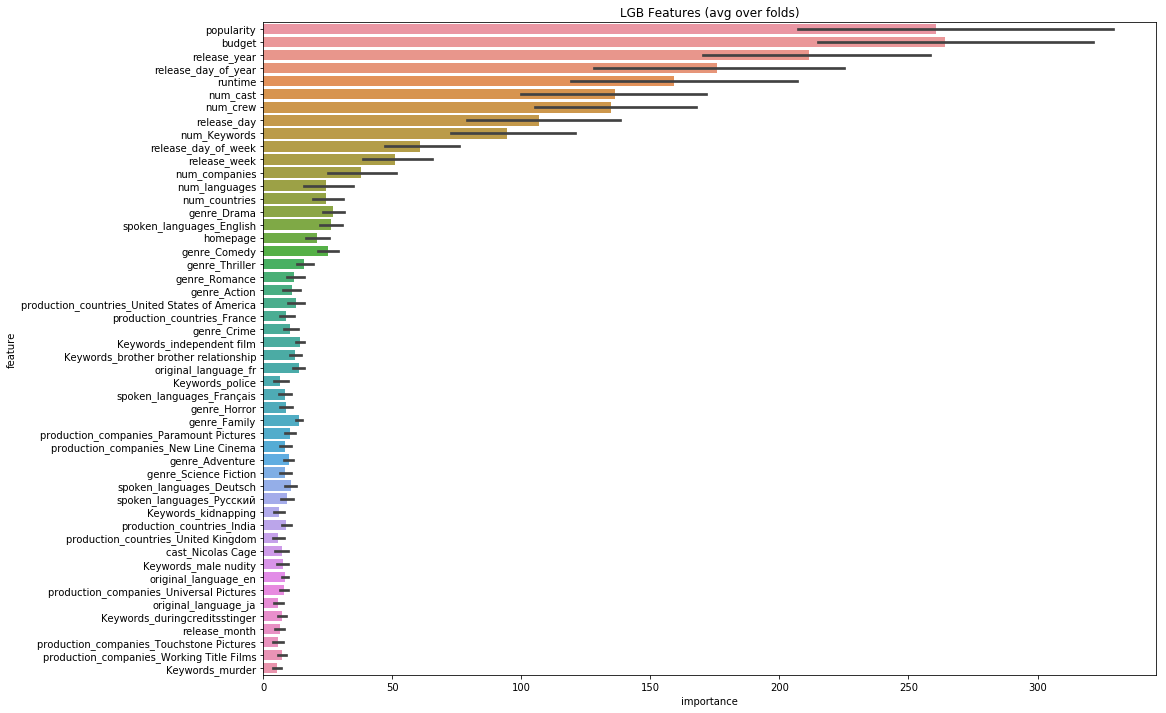

In [30]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 10,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb, prediction_lgb, feature_importance = train_model(train, test, np.log1p(target), params=params, model_type='lgb', plot_feature_importance=True)

train by top 100 important feature and apply light gbm, does not have big difference

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Fold 0 started at Mon Jun 10 23:09:27 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.37484	valid_1's rmse: 2.08491
Early stopping, best iteration is:
[1655]	training's rmse: 1.17417	valid_1's rmse: 2.0751
Fold 1 started at Mon Jun 10 23:09:31 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.42253	valid_1's rmse: 1.79689
Early stopping, best iteration is:
[1029]	training's rmse: 1.41299	valid_1's rmse: 1.79532
Fold 2 started at Mon Jun 10 23:09:34 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.39085	valid_1's rmse: 1.82481
Early stopping, best iteration is:
[1308]	training's rmse: 1.2983	valid_1's rmse: 1.81958
Fold 3 started at Mon Jun 10 23:09:37 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's rmse: 1.38488	valid_1's rmse: 1.86771
Early stopping, best iteration is:
[1372]	training's rmse: 1.26949	valid_1's rmse

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


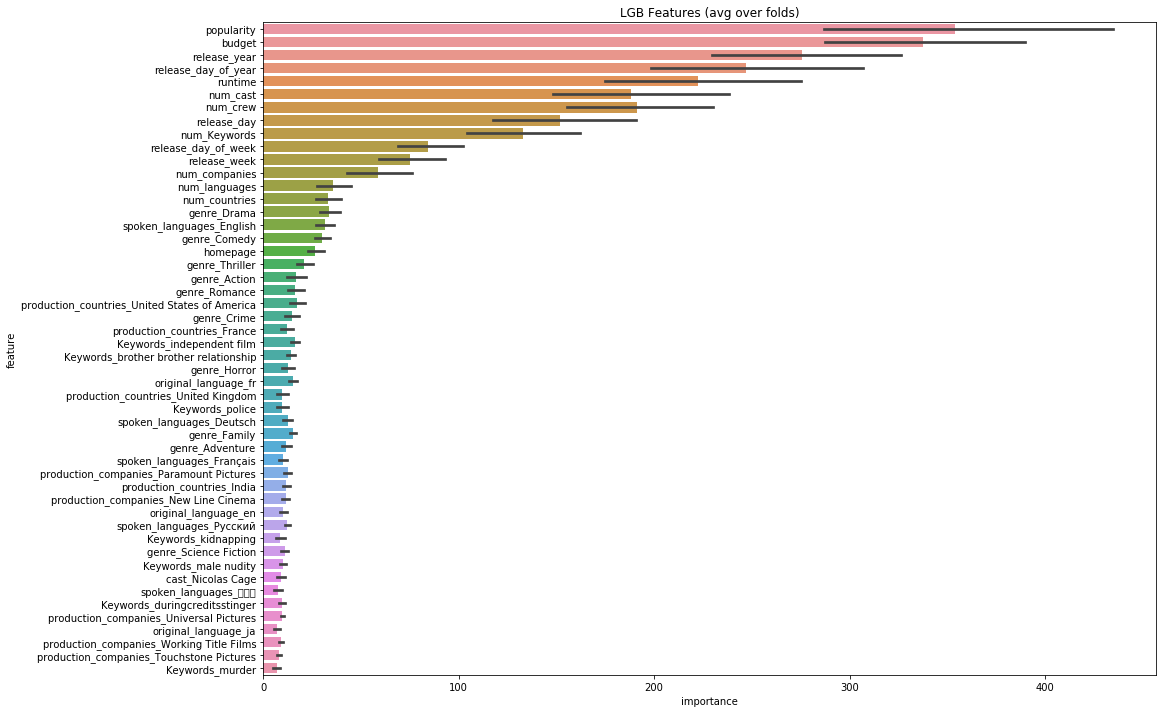

In [31]:
feature_w = feature_importance.groupby("feature")["importance"].sum() / 10
feature_w = feature_w.sort_values(ascending = False)
index = list(feature_w[:100].index)
im_train = train[index]
im_test = test[index]
oof_lgb, prediction_lgb, _ = train_model(im_train, im_test, np.log1p(target), params=params, model_type='lgb', plot_feature_importance=True)

In [32]:
prediction = pd.DataFrame(tid, columns = ["id"])
prediction["revenue"] = np.expm1(prediction_lgb)
prediction = prediction.set_index("id")
prediction.to_csv('lgb_submission.csv') 

Use all features and apply xgboost, performance weaker than light gbm model

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Fold 0 started at Mon Jun 10 23:10:13 2019
[0]	train-rmse:15.5785	valid_data-rmse:15.8753
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.18951	valid_data-rmse:2.1193
[1000]	train-rmse:0.91129	valid_data-rmse:2.10845
Stopping. Best iteration:
[1166]	train-rmse:0.859967	valid_data-rmse:2.10707

Fold 1 started at Mon Jun 10 23:10:45 2019
[0]	train-rmse:15.6066	valid_data-rmse:15.6196
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-rmse:1.20623	valid_data-rmse:1.8438
[1000]	train-rmse:0.939213	valid_data-rmse:1.8194
Stopping. Best iteration:
[851]	train-rmse:0.995869	valid_data-rmse:1.81682

Fold 2 started at Mon Jun 10 23:11:10 2019
[0]	train-rmse:15.5968	valid_data-rmse:15.7095
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-rmse:1.19948	valid_data-rmse:1.98206
[1000]	train-rmse:0.921725	valid_data-rmse:1.95373
[1500]	train-rmse:0.786151	valid_data-rmse:1.95353
Stopping. Best iteration:
[1435]	train-rmse:0.805337	valid_data-rmse:1.95053

Fold 3 started at Mon Jun 10 23:11:47 2019
[0]	train-rmse:15.6272	valid_data-rmse:15.4333
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-rmse:1.18426	valid_data-rmse:1.9835
[1000]	train-rmse:0.913651	valid_data-rmse:1.972
Stopping. Best iteration:
[929]	train-rmse:0.933396	valid_data-rmse:1.96935

Fold 4 started at Mon Jun 10 23:12:12 2019
[0]	train-rmse:15.6051	valid_data-rmse:15.6381
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-rmse:1.1618	valid_data-rmse:2.18185
[1000]	train-rmse:0.87375	valid_data-rmse:2.15076
[1500]	train-rmse:0.716157	valid_data-rmse:2.145
Stopping. Best iteration:
[1623]	train-rmse:0.680893	valid_data-rmse:2.14236

Fold 5 started at Mon Jun 10 23:12:54 2019
[0]	train-rmse:15.6149	valid_data-rmse:15.5502
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-rmse:1.20878	valid_data-rmse:1.89591
[1000]	train-rmse:0.944223	valid_data-rmse:1.87388
Stopping. Best iteration:
[1115]	train-rmse:0.912408	valid_data-rmse:1.86937

Fold 6 started at Mon Jun 10 23:13:25 2019
[0]	train-rmse:15.6045	valid_data-rmse:15.6394
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-rmse:1.15693	valid_data-rmse:2.48208
Stopping. Best iteration:
[703]	train-rmse:1.01783	valid_data-rmse:2.4769

Fold 7 started at Mon Jun 10 23:13:46 2019
[0]	train-rmse:15.6341	valid_data-rmse:15.373
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-rmse:1.16787	valid_data-rmse:2.25541
[1000]	train-rmse:0.876961	valid_data-rmse:2.24088
Stopping. Best iteration:
[1188]	train-rmse:0.804986	valid_data-rmse:2.23587

Fold 8 started at Mon Jun 10 23:14:17 2019
[0]	train-rmse:15.6196	valid_data-rmse:15.507
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-rmse:1.17667	valid_data-rmse:2.29176
Stopping. Best iteration:
[485]	train-rmse:1.19144	valid_data-rmse:2.29104

Fold 9 started at Mon Jun 10 23:14:32 2019
[0]	train-rmse:15.5935	valid_data-rmse:15.7339
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[500]	train-rmse:1.18435	valid_data-rmse:2.09861
[1000]	train-rmse:0.897804	valid_data-rmse:2.06776
[1500]	train-rmse:0.743612	valid_data-rmse:2.06466
[2000]	train-rmse:0.643747	valid_data-rmse:2.06049
Stopping. Best iteration:
[2092]	train-rmse:0.626963	valid_data-rmse:2.05861

CV mean score: 2.0918, std: 0.1931.
309.16461849999996 seconds


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


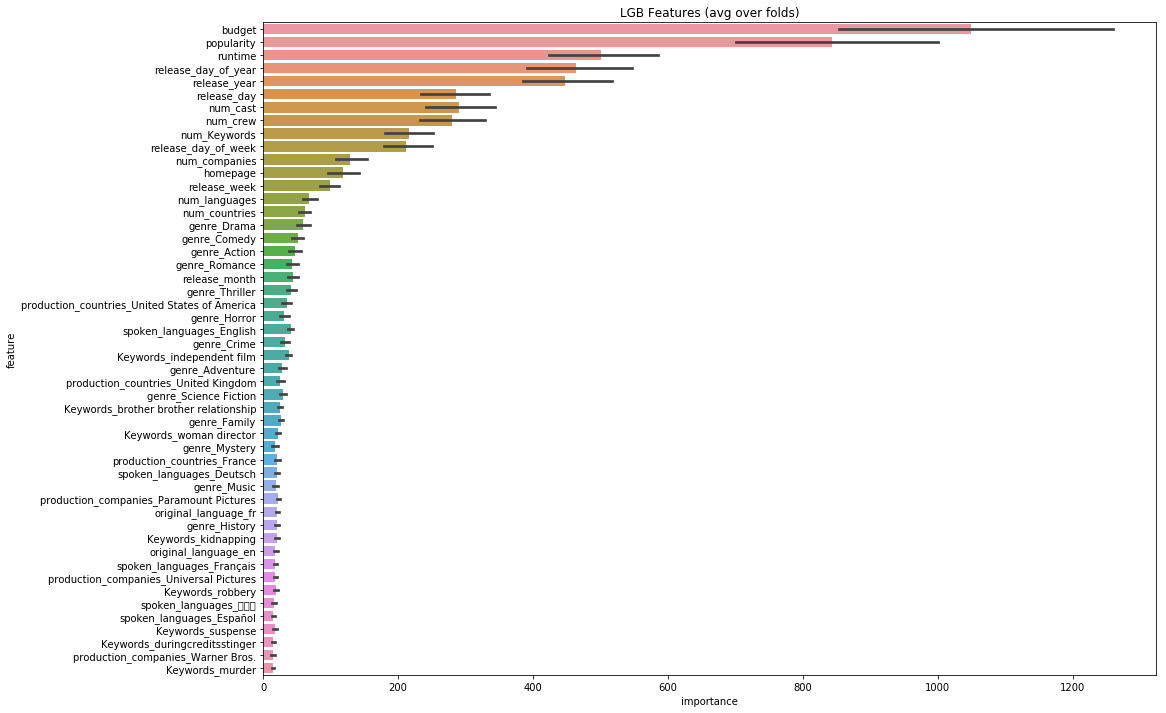

In [33]:
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 7,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}
oof_xgb, prediction_xgb, _ = train_model(train, test, np.log1p(target), params=xgb_params, model_type='xgb', plot_feature_importance=True)

In [34]:
prediction = pd.DataFrame(tid, columns = ["id"])
prediction["revenue"] = np.expm1(prediction_xgb)
prediction = prediction.set_index("id")
prediction.to_csv('xgb_submission.csv') 

In [35]:
prediction = pd.DataFrame(tid, columns = ["id"])
prediction["revenue"] = np.expm1((prediction_lgb + prediction_xgb) / 2)
prediction = prediction.set_index("id")
prediction.to_csv('lgb + xgb_submission.csv') 